In [1]:
(* Utilities *)
GenerateTeX[expr_, texrules_] := Block[
    {n, symbols, texts, rules1, rules2},
    n=Length[texrules];
    symbols = Table[Symbol["$generatetex"<>ToString[i]], {i,1,n}];
    texts = Table["\\text{$\\$$generatetex"<>ToString[i]<>"}", {i,1,n}];
    rules1 = Table[Rule[texrules[[i]][[1]], symbols[[i]]], {i,n}];
    rules2 = Table[Rule[texts[[i]], "{"<>texrules[[i]][[2]]<>"}"], {i,n}];
    StringReplace[ToString[TeXForm[expr /. rules1]], rules2]
]

In [3]:
(* Reference state: Sphere *)
𝒑₍₀₎[u¹_, u²_] = R*{Cos[u¹/R]Cos[u²/R], Sin[u¹/R]Cos[u²/R], Sin[u²/R]};

(* Tangent vector *)
𝒑₍₀₎₁[u¹_, u²_] = D[𝒑₍₀₎[u¹, u²], u¹];
𝒑₍₀₎₂[u¹_, u²_] = D[𝒑₍₀₎[u¹, u²], u²];
(* Riemanninan metric *)
g₍₀₎₁₁[u¹_, u²_] = 𝒑₍₀₎₁[u¹, u²].𝒑₍₀₎₁[u¹, u²] // Simplify;
g₍₀₎₁₂[u¹_, u²_] = 𝒑₍₀₎₁[u¹, u²].𝒑₍₀₎₂[u¹, u²] // Simplify;
g₍₀₎₂₁[u¹_, u²_] = 𝒑₍₀₎₂[u¹, u²].𝒑₍₀₎₁[u¹, u²] // Simplify;
g₍₀₎₂₂[u¹_, u²_] = 𝒑₍₀₎₂[u¹, u²].𝒑₍₀₎₂[u¹, u²] // Simplify;
g₍₀₎[u¹_, u²_] = {{g₍₀₎₁₁[u¹, u²],g₍₀₎₁₂[u¹, u²]},{g₍₀₎₂₁[u¹, u²],g₍₀₎₂₂[u¹, u²]}};
g₍₀₎⁽⁰⁾₁₁ = 1;
g₍₀₎⁽⁰⁾₁₂ = 0;
g₍₀₎⁽⁰⁾₂₁ = 0;
g₍₀₎⁽⁰⁾₂₂ = 1;
g₍₀₎⁽⁰⁾ = {{g₍₀₎⁽⁰⁾₁₁,g₍₀₎⁽⁰⁾₁₂},{g₍₀₎⁽⁰⁾₂₁,g₍₀₎⁽⁰⁾₂₂}};
(* Volume form *)
𝝊₍₀₎[u¹_, u²_] = Sqrt[Det[g₍₀₎[u¹, u²]]];

In [21]:
(* Current state *)
𝒄₍ₜ₎ᵦ[u¹_, β_] = {s₍ₜ₎ᵦ[β] u¹, 0};
𝒆₁₍ₜ₎ᵦ[u¹_, β_] = {1,0};
𝒆₂₍ₜ₎ᵦ[u¹_, β_] = {0,1};
𝜉ᵦ[u¹_, u²_, β_] = 0;
𝜂ᵦ[u¹_, u²_, β_];
Derivative[i_,0,0][𝜂ᵦ][u¹_, u²_, β_] = 0;
𝒑₍ₜ₎ᵦ[u¹_, u²_, β_] = 𝒄₍ₜ₎ᵦ[u¹, β] + 𝜉ᵦ[u¹, u², β]𝒆₁₍ₜ₎ᵦ[u¹, β] + 𝜂ᵦ[u¹, u², β]𝒆₂₍ₜ₎ᵦ[u¹, β];

(* Tangent vector *)
𝒑₍ₜ₎ᵦ₁[u¹_, u²_, β_] = D[𝒑₍ₜ₎ᵦ[u¹, u², β], u¹];
𝒑₍ₜ₎ᵦ₂[u¹_, u²_, β_] = D[𝒑₍ₜ₎ᵦ[u¹, u², β], u²];
(* Riemannian metric *)
g₍ₜ₎ᵦ₁₁[u¹_, u²_, β_] = 𝒑₍ₜ₎ᵦ₁[u¹, u², β].𝒑₍ₜ₎ᵦ₁[u¹, u², β] // Simplify;
g₍ₜ₎ᵦ₁₂[u¹_, u²_, β_] = 𝒑₍ₜ₎ᵦ₁[u¹, u², β].𝒑₍ₜ₎ᵦ₂[u¹, u², β] // Simplify;
g₍ₜ₎ᵦ₂₁[u¹_, u²_, β_] = 𝒑₍ₜ₎ᵦ₂[u¹, u², β].𝒑₍ₜ₎ᵦ₁[u¹, u², β] // Simplify;
g₍ₜ₎ᵦ₂₂[u¹_, u²_, β_] = 𝒑₍ₜ₎ᵦ₂[u¹, u², β].𝒑₍ₜ₎ᵦ₂[u¹, u², β] // Simplify;
g₍ₜ₎ᵦ[u¹_, u²_, β_] = {{g₍ₜ₎ᵦ₁₁[u¹, u², β],g₍ₜ₎ᵦ₁₂[u¹, u², β]},{g₍ₜ₎ᵦ₂₁[u¹, u², β],g₍ₜ₎ᵦ₂₂[u¹, u², β]}};
g₍ₜ₎ᵦ⁽⁰⁾₁₁[u¹_, u²_, β_] = g₍ₜ₎ᵦ₁₁[u¹, u², β] / g₍₀₎₁₁[u¹, u²];
g₍ₜ₎ᵦ⁽⁰⁾₁₂[u¹_, u²_, β_] = g₍ₜ₎ᵦ₁₂[u¹, u², β] / Sqrt[g₍₀₎₁₁[u¹, u²]];
g₍ₜ₎ᵦ⁽⁰⁾₂₁[u¹_, u²_, β_] = g₍ₜ₎ᵦ₂₁[u¹, u², β] / Sqrt[g₍₀₎₁₁[u¹, u²]];
g₍ₜ₎ᵦ⁽⁰⁾₂₂[u¹_, u²_, β_] = g₍ₜ₎ᵦ₂₂[u¹, u², β];
g₍ₜ₎ᵦ⁽⁰⁾[u¹_, u²_, β_] = {{g₍ₜ₎ᵦ⁽⁰⁾₁₁[u¹, u², β],g₍ₜ₎ᵦ⁽⁰⁾₁₂[u¹, u², β]},{g₍ₜ₎ᵦ⁽⁰⁾₂₁[u¹, u², β],g₍ₜ₎ᵦ⁽⁰⁾₂₂[u¹, u², β]}};

In [125]:
(* Strain tensor *)
E⁽⁰⁾ᵦ[u¹_, u²_, β_] = (g₍ₜ₎ᵦ⁽⁰⁾[u¹, u², β] - g₍₀₎⁽⁰⁾)/2;

d = 2;
𝜆 = 𝜈*Y/((1+𝜈)(1-(d-1)𝜈));
𝜇 = Y/(2(1+𝜈));
𝛿 = KroneckerDelta;
C⁽⁰⁾ = Table[𝜆 𝛿[i,j] 𝛿[k,l] + 𝜇(𝛿[i,k] 𝛿[j,l] + 𝛿[i,l] 𝛿[j,k]),{i,1,d},{j,1,d},{k,1,d},{l,1,d}];

𝒲ᵦ[u¹_,u²_,β_] = Simplify[Sum[C⁽⁰⁾[[i,j,k,l]]*E⁽⁰⁾ᵦ[u¹,u²,β][[i,j]]*E⁽⁰⁾ᵦ[u¹,u²,β][[k,l]],{i,1,d},{j,1,d},{k,1,d},{l,1,d}]*𝝊₍₀₎[u¹,u²]/2, Assumptions -> Cos[u²/R]>0];

この`𝒲ᵦ`をもとに次の2通りの方法で`s₍ₜ₎ᵦ`や`𝜂ᵦ`を求めていく.
* 解析解
* βによる辞書式最小化

In [123]:
texrules = {s₍ₜ₎ᵦ[β]->"s_{[t]\\beta}", Derivative[0,1,0][𝜂ᵦ][u¹,u²,β] -> "\\eta_{\\beta 2}", u¹->"u^1", u²->"u^2", β -> "\\beta", 𝜈->"\\nu"};
CopyToClipboard[GenerateTeX[𝒲ᵦ[u¹,u²,β],texrules]];

$$
W(\beta)
=\int_M -\frac{Y \cos \left(\frac{{u^2}}{R}\right) \left({s_{[t]\beta}}^4 \sec ^4\left(\frac{{u^2}}{R}\right)+2 {s_{[t]\beta}}^2 \left({\eta_{\beta 2}}^2 {\nu}-{\nu}-1\right) \sec ^2\left(\frac{{u^2}}{R}\right)+{\eta_{\beta 2}}^4-2 {\eta_{\beta 2}}^2 ({\nu}+1)+2 ({\nu}+1)\right)}{8 \left({\nu}^2-1\right)} du^1 \wedge du^2
$$

2                            2
  1  c (H  + 2 𝜈 H (-1 + S) + (-1 + S) ) Y
-(-) -------------------------------------
  8                       2
                    -1 + 𝜈
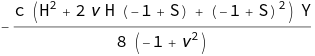

In [75]:
(* s = s₍ₜ₎ᵦ[β] *)
(* c = Cos[u²/R] *)
(* y = 𝜂ᵦ₂ *)
𝒲ᵦa = 𝒲ᵦ[u¹,u²,β] /. {s₍ₜ₎ᵦ[β]->s, Derivative[0,1,0][𝜂ᵦ][u¹,u²,β] -> y, Cos[u²/R] -> c, Sec[u²/R] -> 1/c} // Simplify;
(* S = s^2/c^2 *)
(* H = y^2-1 *)
𝒲ᵦb = 𝒲ᵦa /. {s -> c*Sqrt[S], y->Sqrt[H+1]} // Simplify

1  c Y (2 H δH + 2 𝜈 (-1 + S) δH)
-(-) ------------------------------
  8                   2
                -1 + 𝜈
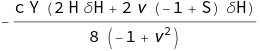

In [82]:
δ𝒲ᵦ = D[𝒲ᵦb /. {H->H+α*δH},α] /. {α -> 0}

In [85]:
solH = Solve[δ𝒲ᵦ == 0, H][[1]][[1]]

H -> -(𝜈 (-1 + S))

2
c (-1 + S)  Y
-------------
      8
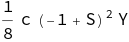

In [88]:
𝒲ᵦc = 𝒲ᵦb /. solH // Simplify

u²         2     u² 2 2
Y Cos[--] (-1 + s  Sec[--] )
      R                R
-----------------------------
              8
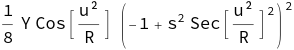

In [114]:
𝒲ᵦd = 𝒲ᵦc /. {S -> s^2/c^2} /. {c -> Cos[u²/R]}

2        2              B β           4       2 B β       B β      B β
R Y (s  (-4 + s ) ArcTanh[Sin[---]] + (1 + s  + Cos[-----]) Sec[---] Tan[---])
                               R                      R          R        R
------------------------------------------------------------------------------
                                      8
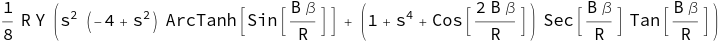

In [115]:
W = Integrate[𝒲ᵦd /. {S -> s^2/c^2} /. {c -> Cos[u²/R]}, {u², -β*B, β*B}]

3             B β                2              B β        3     B β      B β
R Y (2 s  ArcTanh[Sin[---]] + 2 s (-4 + s ) ArcTanh[Sin[---]] + 4 s  Sec[---] Tan[---])
                       R                                 R                R        R
---------------------------------------------------------------------------------------
                                           8
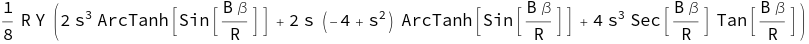

In [110]:
dW = D[W,s]

B β
           Sqrt[2] Sqrt[ArcTanh[Sin[---]]]
                                     R
s -> -------------------------------------------
                      B β         B β      B β
     Sqrt[ArcTanh[Sin[---]] + Sec[---] Tan[---]]
                       R           R        R
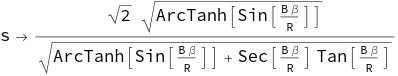

In [112]:
sols = Solve[dW==0, s][[3]][[1]]

B β       u² 2
                    2 ArcTanh[Sin[---]] Sec[--]
      u²                           R        R         2
Y Cos[--] (-1 + -------------------------------------)
      R                     B β         B β      B β
                ArcTanh[Sin[---]] + Sec[---] Tan[---]
                             R           R        R
-------------------------------------------------------
                           8
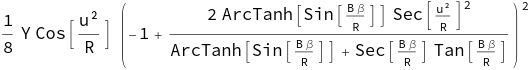

In [116]:
𝒲ᵦd /. sols

-Graphics-
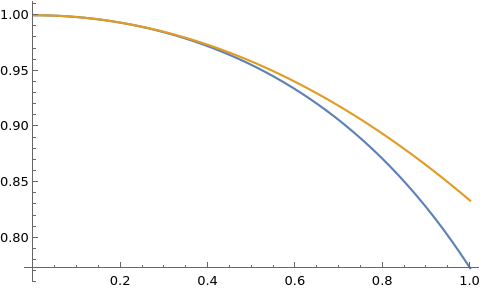

In [122]:
Block[
    {R = 1, B = 1, K = 1/R^2},
    Plot[{s/.sols,1-K*β^2*B^2/6},{β,0,1}]
]